In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import config
import numpy as np
import pandas as pd
import collections
import time
import config ## TODO decide whether to use this or not, or to provide some sort of different option for these variables.
import matplotlib.pyplot as plt


data = pd.read_csv("../datasets/kddcup_data_10_percent_corrected.csv", header = None)


df_results = pd.read_csv("../results_test/20190517-143649_fullRun.csv")

In [9]:


    #####
    ##### Metric Calculation Section
    #####

def caclulateErr(results, Print=False):
    df =pd.DataFrame()
    df["result"] = results["predicted"].str.strip("[]")
    df["truth"] = results["Label"]
    df['result'] = df['result'].astype(np.float64)
    df['truth'] = df['truth'].astype(np.float64)
    res =df.loc[~(df['result'] == df['truth'])]
    output ="error rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)
    return output


def caclulateLatency(results, vRate=None, Print=False):
    df =pd.DataFrame()    
    df['latency'] = results['latency'].astype(np.float64)
    #if isinstance(le_list,(,)):
    #df['vRate'] = vRate
    res =df.loc[~(df['latency'] >= config.LATENCYBOUND)]
    output ="exceed rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)

    vFig =plt.figure()
    vAx = vFig.add_subplot(1,1,1)
    vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
    vAx.plot(vRate,vYRate)

    return output



In [38]:
vRate=np.linspace(1,100,100)
vRate=np.append(vRate,np.linspace(100,1,100))
print(vRate)
print(len(vYRate)* config.READERINTERVAL)
print(config.READERINTERVAL)

vYRate = np.arange(0,len(vRate)* config.READERINTERVAL,config.READERINTERVAL)
vYRate = vYRate.ravel()
print(vYRate)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  100.   99.   98.   97.   96.   95.   94.   93.
   92.   91.   90.   89.   88.   87.   86.   85.   84.   83.   82.   81.
   80.   79.   78.   77.   76.   75.   74.   73.   72.   71.   70.   69.
   68.   67.   66.   65.   64.   63.   62.   61.   60.   59.   58.   57.
   56.   55.   54.   53.   52.   51.   50.   49.   48.   47.   46.   45.
   44.   43.   42.   41.   40.   39.   38.   37.   

(200,)
(2,)


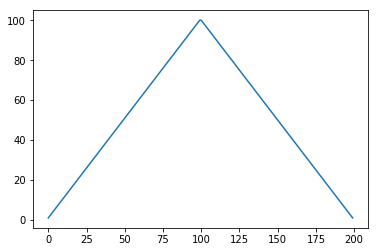

In [39]:
vFig =plt.figure()
vAx = vFig.add_subplot(1,1,1)
vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
print(vRate.shape)
print(vYRate.shape)
vAx.plot(vRate)

ValueError: x and y must have same first dimension, but have shapes (200,) and (2,)

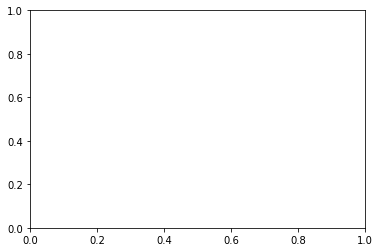

In [30]:
caclulateErr(df_results)
caclulateLatency(df_results, vRate)